# **Introducción al Análisis Exploratorio de Datos (EDA)**

En este análisis exploratorio de datos, nos embarcamos en un viaje para desentrañar las incognitas detrás de los accidentes viales fatales en la Ciudad de Buenos Aires. 

Nuestro objetivo principal es descubrir patrones significativos y comprender en profundidad los factores que contribuyen a estos trágicos sucesos.

A través del análisis detallado de los conjuntos de datos "Homicidios" y "Lesiones", buscamos identificar correlaciones, tendencias y posibles puntos críticos que nos permitan ofrecer recomendaciones concretas para la reducción de la tasa de mortalidad por accidentes viales. 

Este proceso nos brinda una valiosa oportunidad para explorar nuevas perspectivas y desafíos, con la esperanza de contribuir a un entorno vial más seguro y protegido para todos los ciudadanos.

In [1]:
# Importamos las librerias y funciones necesarias

#importamos la librerias necesarias para nuestro analisis
import numpy as np
import pandas as pd
from datetime import datetime



# librerias para visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 


# from bokeh.plotting import figure
# from bokeh. io import output_notebook, push_notebook, show
# output_notebook()


#importamos nuestras funciones almacenadas en el archivo funciones.py
from funciones import cargar_datos_desde_excel
from funciones import analizar_SD
from funciones import analizar_nan
from funciones import data_cleaning
from funciones import analizar_palabra_clave
from funciones import completar_coordenadas_con_comuna
from funciones import analisis_categorico
#from functions import create_mysql_db


#Cargamos nuestros datasets
homicidios = pd.read_csv('../Datasets/2_cleaned_data/homicidios_limpios.csv')
lesiones = pd.read_csv('../Datasets/2_cleaned_data/lesiones_limpios.csv')
poblacion = pd.read_csv('../Datasets/2_cleaned_data/poblacion_comunas_VIZ.csv')

---
### **Aspectos Importantes del Análisis:**

El Instituto de [nombre del instituto] proporciona dos conjuntos de datos, "Homicidios" y "Lesiones", ambos previamente limpiados y relacionados con siniestros viales en la ciudad de Buenos Aires entre los años 2016 y 2021.

1. **Concatenación de Datos:**
   - Los conjuntos de datos se categorizan por gravedad:
     - Tipo de Gravedad: 'Fatal'
     - Tipo de Gravedad: 'Grave'
     - Tipo de Gravedad: 'Leve'
   
2. **Análisis Inicial:**
   - Comenzaremos analizando la calidad de los datos en el conjunto "Homicidios", incluyendo la identificación de datos faltantes, duplicados, outliers y otros aspectos.

3. **Exploración de Datos:**
   - Utilizaremos la tabla "Lesiones" para obtener una perspectiva más amplia de la situación relacionada con siniestros viales.
   - Nuestro enfoque inicial será comprender la frecuencia y la distribución de los diferentes tipos de siniestros viales, así como cualquier patrón temporal o geográfico relevante.

4. **Análisis Detallado:**
   - Luego, profundizaremos en el análisis de correlaciones entre los conjuntos de datos para descubrir qué historias nos están contando los datos.
   - Esto puede incluir explorar relaciones entre variables como tipo de calle, ubicación, tipo de vehículo involucrado, edad y género de las personas afectadas, entre otros aspectos relevantes.

Este enfoque nos permitirá identificar patrones significativos, tendencias emergentes y posibles áreas de enfoque para políticas de prevención de siniestros viales en la ciudad.

In [2]:
# vista previa de la tabla homicidios 
homicidios.head(2)

,id_hecho,nro_victimas,fecha,hora,tipo_calle,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal


In [3]:
# vista previa de la tabla Lesiones 
lesiones.head(2)

,id_hecho,nro_victimas,fecha,hora,tipo_calle,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01,9,NaN,14,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01,1,NaN,8,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve


In [4]:
# Forma de las tablas Homicidios y Lesiones
print(f'NOTA:\n'
      f' - La tabla "Homicidios" cuenta con {homicidios.shape[0]} registros y {homicidios.shape[1]} columnas\n'
      f'\n'
      f' - La tabla "Lesiones" cuenta con {lesiones.shape[0]} registros y {lesiones.shape[1]} columnas')


NOTA:
 - La tabla "Homicidios" cuenta con 717 registros y 14 columnas

 - La tabla "Lesiones" cuenta con 26965 registros y 14 columnas


In [5]:
# Concatenamos los dos datasets 
siniestros = pd.concat([homicidios, lesiones], ignore_index=True)

# Filtrar los registros donde la gravedad es 'fatal'
siniestros_fatal = siniestros[siniestros['gravedad'] == 'fatal']

# Filtrar los registros donde la gravedad es 'fatal'
siniestros_no_fatal = siniestros[siniestros['gravedad'] != 'fatal']


#### **Vista previa - Dataset Concatenado**

In [6]:
siniestros.head()

,id_hecho,nro_victimas,fecha,hora,tipo_calle,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal
3,2016-0004,1,2016-01-10,0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal
4,2016-0005,1,2016-01-21,5,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal


#### **Tipo de datos Concatenado - Siniestros RAW**

In [7]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hecho      27682 non-null  object 
 1   nro_victimas  27682 non-null  int64  
 2   fecha         27682 non-null  object 
 3   hora          27682 non-null  int64  
 4   tipo_calle    15281 non-null  object 
 5   comuna        27682 non-null  int64  
 6   longitud      27682 non-null  float64
 7   latitud       27682 non-null  float64
 8   victima       15276 non-null  object 
 9   acusado       10283 non-null  object 
 10  rol           706 non-null    object 
 11  sexo          25568 non-null  object 
 12  edad          23423 non-null  float64
 13  gravedad      27682 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 3.0+ MB


In [8]:
# Convertimos los tipos de dato de las columnas 

siniestros['id_hecho'] = siniestros['id_hecho'].astype('category')
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'])
siniestros['hora'] = siniestros['hora'].astype('int')
# siniestros['hora'] = siniestros['hora'].astype('category')
siniestros['tipo_calle'] = siniestros['tipo_calle'].astype('category')
siniestros['comuna'] = siniestros['comuna'].astype('category')
siniestros['victima'] = siniestros['victima'].astype('category')
siniestros['acusado'] = siniestros['acusado'].astype('category')
siniestros['rol'] = siniestros['rol'].astype('category')
siniestros['sexo'] = siniestros['sexo'].astype('category')
siniestros['edad'] = pd.to_numeric(siniestros['edad'], errors='coerce').astype('Int64')
siniestros['edad'] = siniestros['edad'].astype('category')
siniestros['gravedad'] = siniestros['gravedad'].astype('category')

#### **Agregamos unas columnas adicionales de tipo Date  para nuestro analisis**

In [9]:

# Convertimos la columna 'fecha' a tipo datetime
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'])

# Crear nuevas columnas: year, month, quarter, semester
siniestros['año'] = siniestros['fecha'].dt.year
siniestros['mes'] = siniestros['fecha'].dt.month
siniestros['trimestre'] = siniestros['fecha'].dt.quarter
siniestros['semestre'] = siniestros['fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

#### **Tipos de dato en columnas Transformados- Tabla Siniestros**

In [10]:
# SINIESTROS vista previa de las columnas y sus tipos de datos
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_hecho      27682 non-null  category      
 1   nro_victimas  27682 non-null  int64         
 2   fecha         27682 non-null  datetime64[ns]
 3   hora          27682 non-null  int64         
 4   tipo_calle    15281 non-null  category      
 5   comuna        27682 non-null  category      
 6   longitud      27682 non-null  float64       
 7   latitud       27682 non-null  float64       
 8   victima       15276 non-null  category      
 9   acusado       10283 non-null  category      
 10  rol           706 non-null    category      
 11  sexo          25568 non-null  category      
 12  edad          23423 non-null  category      
 13  gravedad      27682 non-null  category      
 14  año           27682 non-null  int32         
 15  mes           27682 non-null  int32 

#### **Tipos de Gravedad - Tabla Siniestros**

In [11]:
analisis_categorico(siniestros, 'gravedad')

,gravedad,Frecuencia
0,fatal,717
1,grave,537
2,leve,26428


---
## **Insights**
  
    El conjunto de datos comprende un total de 27,682 registros y 18 columnas. A continuación, se proporciona un resumen de las características de las columnas:

| Columna          | Descripción                                         | Tipo             |
|------------------|-----------------------------------------------------|------------------|
| id_hecho         | Identificador único del hecho                       | category         |
| nro_victimas     | Número total de víctimas involucradas              | int64            |
| fecha            | Fecha en que ocurrió el hecho                       | datetime64[ns]   |
| hora             | Hora en que tuvo lugar el hecho                    | category         |
| tipo_calle       | Tipo de calle donde ocurrió el hecho               | category         |
| comuna           | Comuna donde se registró el hecho                  | category         |
| longitud         | Coordenada de longitud geográfica                  | float64          |
| latitud          | Coordenada de latitud geográfica                   | float64          |
| victima          | Categoría del vehículo asociado a la víctima       | category         |
| acusado          | Categoría del vehículo señalado como responsable   | category         |
| rol              | Rol específico desempeñado por la persona involucrada en el hecho | category |
| sexo             | Género de las personas involucradas                | category         |
| edad             | Edad de las personas involucradas                  | category         |
| gravedad         | Nivel de gravedad del hecho                        | category         |
| año              | Año en que ocurrió el hecho                        | int32            |
| mes              | Mes en que ocurrió el hecho                        | int32            |
| trimestre        | Trimestre del año en que ocurrió el hecho          | int32            |
| semestre         | Semestre del año en que ocurrió el hecho           | int64            |

---

La categorización de ciertas columnas en nuestro conjunto de datos tiene varios beneficios en el proceso de análisis de datos. A continuación, se justifica la categorización de las columnas que seleccionamos:

- `Hora` del Incidente:** Categorizar la franja horaria ayuda a identificar patrones temporales en la ocurrencia de siniestros viales, como las horas pico.

- `Tipo de Vía:` La categorización del tipo de calle permite analizar la relación entre el tipo de vía y la frecuencia de siniestros, revelando áreas con mayor incidencia de incidentes.

- `Comuna:` Categorizar las comunas simplifica el análisis geográfico, facilitando la identificación de áreas con distintas tasas de siniestralidad.

- `Vehículo Involucrado:` La categorización de los tipos de vehículos ofrece una visión clara de los escenarios de siniestros, identificando vehículos con mayor propensión a estar involucrados.

- `Rol de la Persona Involucrada:` Simplifica el análisis de la relación entre roles específicos y la frecuencia de siniestros, revelando patrones de incidencia.

- `Género:` Facilita el análisis de la distribución de siniestros entre géneros, identificando posibles disparidades en la frecuencia de incidentes.

- `Edad:` Agrupa a las personas en rangos etarios para simplificar el análisis demográfico y detectar grupos más afectados por los siniestros.

- `Gravedad del Incidente:` Permite clasificar los incidentes en diferentes niveles de seriedad, facilitando el análisis de la distribución de la gravedad de los siniestros.




---
## **Valores Nulos**
#### **Valores nulos para accidentes **Fatales****

In [12]:
#Accidentes Fatales

# Filtrar los registros donde la columna 'gravedad' es 'fatal'
siniestros_fatal = siniestros[siniestros['gravedad'] == 'fatal']

# Conteo de variables nulas por columna
nulos_por_columna_fatal = siniestros_fatal.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos_por_columna_fatal = (nulos_por_columna_fatal / len(siniestros_fatal)) * 100

# Crear un DataFrame con el recuento de valores nulos y el porcentaje representativo por columna
analisis_nulos_fatal = pd.DataFrame({'Valores Nulos': nulos_por_columna_fatal, 'Porcentaje de Nulos (%)': porcentaje_nulos_por_columna_fatal})

# Mostrar el DataFrame resultante
analisis_nulos_fatal


,Valores Nulos,Porcentaje de Nulos (%)
id_hecho,0,0.000000
nro_victimas,0,0.000000
fecha,0,0.000000
hora,0,0.000000
tipo_calle,0,0.000000
comuna,0,0.000000
longitud,0,0.000000
latitud,0,0.000000
victima,9,1.255230
acusado,23,3.207810


#### **Valores nulos  para  accidentes Leves & Graves - No Fatales**

In [13]:
#Accidentes No Mortales

# Conteo de variables nulas por columna
nulos_por_columna__no_fatal = siniestros_no_fatal.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos_por_columna_no_fatal2 = (nulos_por_columna__no_fatal / len(siniestros_no_fatal)) * 100

# Crear un DataFrame con el recuento de valores nulos y el porcentaje representativo por columna
analisis_nulos_no_fatal2 = pd.DataFrame({'Valores Nulos': nulos_por_columna__no_fatal, 'Porcentaje de Nulos (%)': porcentaje_nulos_por_columna_no_fatal2})

analisis_nulos_no_fatal2

,Valores Nulos,Porcentaje de Nulos (%)
id_hecho,0,0.000000
nro_victimas,0,0.000000
fecha,0,0.000000
hora,0,0.000000
tipo_calle,12401,45.989245
comuna,0,0.000000
longitud,0,0.000000
latitud,0,0.000000
victima,12397,45.974411
acusado,17376,64.439088


#### **Graficos de Valores Nulos por Columna** 

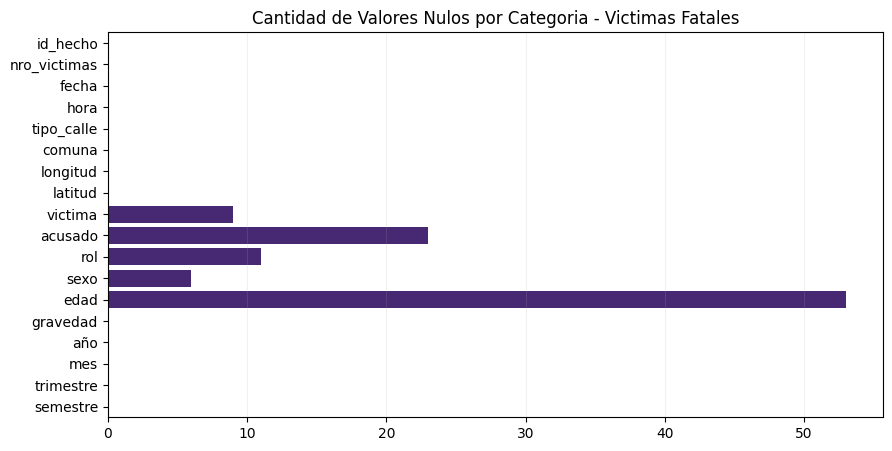

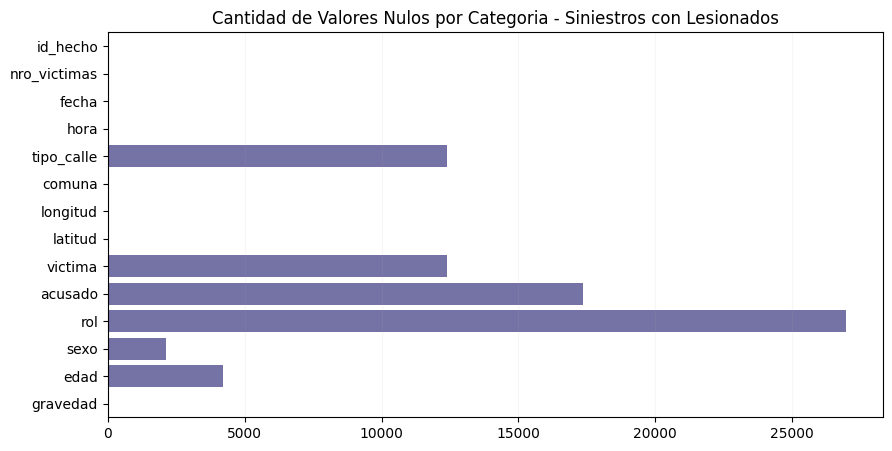

In [14]:
#Graficos de Valores Nulos Por Columna

# Color para gravedad 'Fatal'
color_fatal = '#441B80'

# Color para gravedad 'Lesiones'
color_grave = '#6D69AD'


# Valores nulos - Siniestros con Victimas Fatales 
plt.figure(figsize=(10, 5))
sns.barplot(x='Valores Nulos', y=analisis_nulos_fatal.index, data=analisis_nulos_fatal, orient='h', color=color_fatal, edgecolor='none')
plt.grid(axis='x', alpha=0.17)
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de Valores Nulos por Categoria - Victimas Fatales')
plt.show()

# Valores nulos - Siniestros con Lesionados
plt.figure(figsize=(10, 5))
sns.barplot(x='Valores Nulos', y=analisis_nulos_no_fatal2.index, data=analisis_nulos_no_fatal2, orient='h', color=color_grave, edgecolor='none')
plt.grid(axis='x', alpha=0.17)
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de Valores Nulos por Categoria - Siniestros con Lesionados')
plt.grid(axis='x', alpha=0.1)
plt.show()



#### **Insights - Valores Nulos** 

- Durante nuestra exploración inicial, identificamos valores nulos en los datos, destacados por el color rojo para los accidentes mortales y amarillo para los graves y leves.

- Para los siniestros con gravedad fatal, las columnas como **'victima', 'acusado', 'sexo' y 'edad'** muestran valores nulos que podrían ser normalizados utilizando la distribución del dataset o la media.

- En comparación, las columnas relacionadas con siniestros no fatales presentan una proporción significativa de valores nulos, lo que dificulta la normalización de los datos.

- Estos hallazgos subrayan la importancia de priorizar el análisis de los siniestros fatales para identificar áreas críticas en la seguridad vial y desarrollar intervenciones efectivas.

---
## **Valores Duplicados**

### **Análisis de Registros Únicos y Duplicados**

Para comprender la naturaleza de los registros en nuestro conjunto de datos, realizaremos un análisis detallado de los IDs únicos y los registros duplicados. Esto nos permitirá obtener una visión más clara de la calidad de nuestros datos y de posibles inconsistencias en la recopilación.

- **IDs Únicos:**
  - Utilizaremos el identificador único de siniestro ('id_hecho') para determinar cuántos siniestros únicos existen en las categorías 'Fatal' y 'Lesionados', así como el total de registros en el conjunto de datos.

  - Es importante destacar que un ID duplicado no necesariamente indica un registro duplicado, ya que puede haber múltiples víctimas o lesionados en un mismo siniestro.
  
- **Registros Duplicados:**
  - Para identificar los registros duplicados, analizaremos cada registro en función de todas sus columnas. Esto nos permitirá detectar coincidencias completas entre los registros y así determinar los casos reales de duplicación.


In [15]:
#Tabla de registros unicos y duplicados por gravedad

# Número de IDs únicos para Homicidios viales (Fatal)
num_unique_id_hecho_fatal = siniestros[siniestros['gravedad'] == 'fatal']['id_hecho'].nunique()

# Número de IDs únicos para Lesiones viales (No Fatal)
num_unique_id_hecho_no_fatal = siniestros[siniestros['gravedad'] != 'fatal']['id_hecho'].nunique()

# Número total de IDs únicos
num_siniestros_unicos = siniestros['id_hecho'].nunique()

# Número total de id_hecho con gravedad Fatal
num_total_fatal = siniestros[siniestros['gravedad'] == 'fatal'].shape[0]

# Número total de id_hecho con gravedad de Lesionados
num_total_no_fatal = siniestros[siniestros['gravedad'] != 'fatal'].shape[0]

# Crear un DataFrame
data = {
    'Tipo de Siniestro': ['Fatal', 'Lesionados', 'Total'],
    'IDs Únicos': [num_unique_id_hecho_fatal, num_unique_id_hecho_no_fatal, num_siniestros_unicos],
    'Total Registros': [num_total_fatal, num_total_no_fatal, num_total_fatal + num_total_no_fatal]
}

df_siniestros_unicos = pd.DataFrame(data)

# Mostrar el DataFrame
df_siniestros_unicos


,Tipo de Siniestro,IDs Únicos,Total Registros
0,Fatal,696,717
1,Lesionados,23781,26965
2,Total,24477,27682


#### **Identificaremos las columnas que son realmente duplicados**

#### **Ya que es poco probable que todos los registros como edad, sexo y demas sean iguales**

In [16]:
# Identificamos los registros duplicadas en funcion de todas sus columnas
duplicates = siniestros[siniestros.duplicated()]

# Contar el número de filas duplicadas
num_duplicates = siniestros.duplicated().sum()

# Mostrar el número de duplicados
print("Número de filas duplicadas:", num_duplicates)
print("")
# Mostrar las filas duplicadas
print("Filas duplicadas:")
duplicates.head()


Número de filas duplicadas: 0

Filas duplicadas:


,id_hecho,nro_victimas,fecha,hora,tipo_calle,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,gravedad,año,mes,trimestre,semestre


In [17]:
# Consulta aleatoria para confirmar la duplicidad de registros por id_hecho
id_siniestro_consulta = "LC-2019-0103654"
consulta_resultados = siniestros[siniestros['id_hecho'] == id_siniestro_consulta]
consulta_resultados

,id_hecho,nro_victimas,fecha,hora,tipo_calle,comuna,longitud,latitud,victima,acusado,rol,sexo,edad,gravedad,año,mes,trimestre,semestre
2010,LC-2019-0103654,5,2019-02-18,11,NaN,8,-58.371488,-34.598416,NaN,NaN,NaN,femenino,16,leve,2019,2,1,1
2011,LC-2019-0103654,5,2019-02-18,11,NaN,8,-58.371488,-34.598416,NaN,NaN,NaN,masculino,16,leve,2019,2,1,1
2012,LC-2019-0103654,5,2019-02-18,11,NaN,8,-58.371488,-34.598416,NaN,NaN,NaN,masculino,37,leve,2019,2,1,1
2013,LC-2019-0103654,5,2019-02-18,11,NaN,8,-58.371488,-34.598416,NaN,NaN,NaN,masculino,NaN,leve,2019,2,1,1
2014,LC-2019-0103654,5,2019-02-18,11,NaN,8,-58.371488,-34.598416,NaN,NaN,NaN,masculino,38,leve,2019,2,1,1


In [18]:
# Filtrar y eliminar filas donde 'año' sea igual a 1970
siniestros = siniestros[siniestros['año'] != 1970]


##### - Podemos observar que no contamos con registros duplicados, ya que parecen ser registros diferentes.
##### - Cabe aclarar que este proceso es unicamente si contacemos con registros duplicados prodriamos visualizarlos de la siguiente manera: 

Grafico de los registros duplicados, 0 = no duplicado  1= duplicado

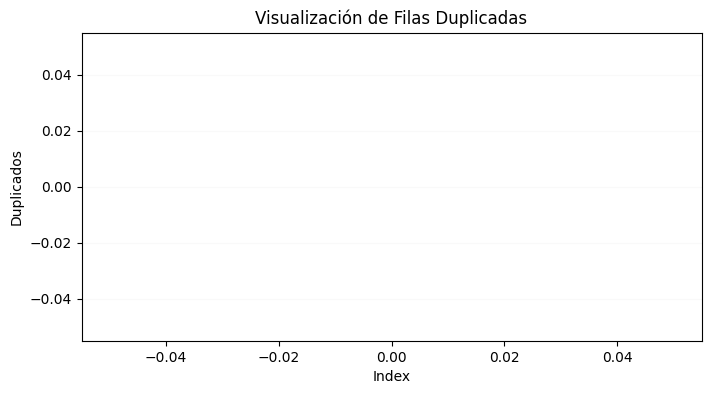

In [19]:
# Grafico de duplicados por index de registros
# Identificar filas duplicadas
filas_duplicadas = siniestros[siniestros.duplicated()]

# Crear un gráfico de barras para mostrar la cantidad de duplicados en cada fila
plt.figure(figsize=(8,4))
plt.bar(filas_duplicadas.index, height=1, color='thistle', edgecolor='lightblue', linewidth=4, label='Duplicados')
plt.title('Visualización de Filas Duplicadas')
plt.xlabel('Index')
plt.ylabel('Duplicados')
plt.grid(axis='y', alpha=0.07)
plt.show()

---
## **Analisis Outliers**

Con el objetivo de identificar la presencia de outliers en nuestro dataset, (solo de ser necesario) vamos a realizar los siguientes pasos:

1. **Identificar las columnas numéricas:**
   - Identifica las columnas que contienen datos numéricos en tu conjunto de datos como numero de victimas y edad,.

2. **Visualizar distribuciones:**
   - Utiliza gráficos como histogramas para visualizar la distribución de los datos en cada una de las columnas numéricas.

3. **Calcular estadísticas resumen:**
   - Calcula estadísticas resumen como la media, la mediana, el rango intercuartílico (IQR) y los límites para identificar outliers potenciales en tus datos.

4. **Identificar outliers:**
   - Emplearemos de ser necesario métodos estadísticos o gráficos para identificar valores que estén significativamente fuera de lo esperado en función de la distribución de los datos.

5. **Manejo de outliers:**
   - Decidiremos cómo manejar los outliers una vez identificados. Puedes optar por eliminar los valores atípicos, transformarlos o tratarlos de alguna otra manera según el contexto de tus datos y el objetivo de tu análisis.

Estos pasos son solo referencia de ser necesario el manejo de outliers en el dataset, cabe aclarar que el dataset a sido previamente limpiado y tratado por motivos de optimizacion de procesos.

In [20]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27681 entries, 0 to 27681
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_hecho      27681 non-null  category      
 1   nro_victimas  27681 non-null  int64         
 2   fecha         27681 non-null  datetime64[ns]
 3   hora          27681 non-null  int64         
 4   tipo_calle    15281 non-null  category      
 5   comuna        27681 non-null  category      
 6   longitud      27681 non-null  float64       
 7   latitud       27681 non-null  float64       
 8   victima       15275 non-null  category      
 9   acusado       10282 non-null  category      
 10  rol           706 non-null    category      
 11  sexo          25567 non-null  category      
 12  edad          23422 non-null  category      
 13  gravedad      27681 non-null  category      
 14  año           27681 non-null  int32         
 15  mes           27681 non-null  int32      


## **Numero de Victimas - Analisis de Outliers**

### **Grafico de Distribucion de Accidentes Fatales y Lesiones (Leves y Graves)**

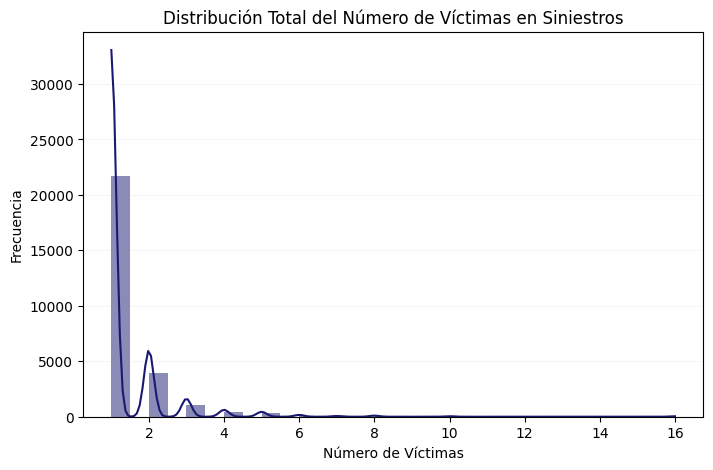

- Resumen estadistico de la columna Numero de victimas -


count    27681.000000
mean         1.374517
std          1.013179
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: nro_victimas, dtype: float64

In [21]:

plt.figure(figsize=(8, 5))
sns.histplot(data=siniestros, x='nro_victimas', bins=30, kde=True, color='midnightblue', edgecolor='none')
plt.title('Distribución Total del Número de Víctimas en Siniestros')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.1)
plt.show()

print('- Resumen estadistico de la columna Numero de victimas -')
siniestros['nro_victimas'].describe()

### **Grafico de Distribucion de Victimas en Accidentes Fatales**

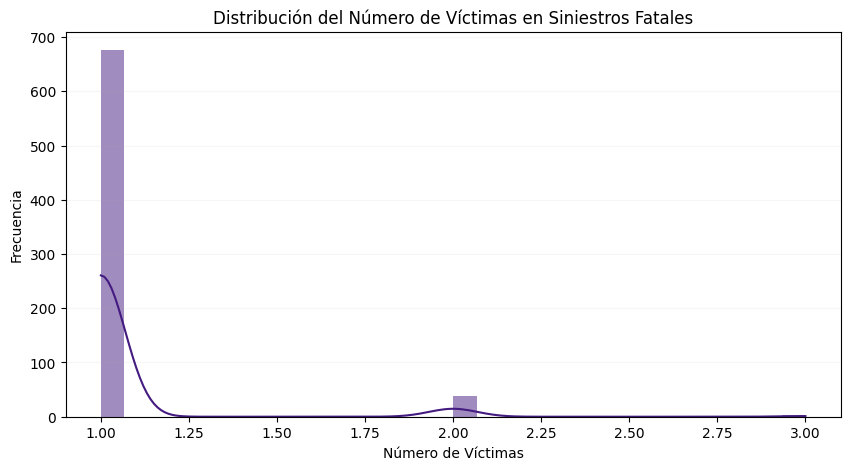

Resumen Estadistico del Numero de victimas Fatales


count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: nro_victimas, dtype: float64

In [22]:

# Filtrar los siniestros con tipo de gravedad 
siniestros_fatal = siniestros[siniestros['gravedad'] == 'fatal']
siniestros_no_fatal = siniestros[siniestros['gravedad'] != 'fatal']
siniestros_leve = siniestros[siniestros['gravedad'] == 'leve']
siniestros_grave = siniestros[siniestros['gravedad'] == 'grave']

# Crear el histograma para siniestros con gravedad 'fatal'
plt.figure(figsize=(10, 5))
sns.histplot(data=siniestros_fatal, x='nro_victimas', bins=30, kde=True, color='#441B80', edgecolor='none')
plt.title('Distribución del Número de Víctimas en Siniestros Fatales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.1)
plt.show()


print('Resumen Estadistico del Numero de victimas Fatales')
siniestros_fatal['nro_victimas'].describe()


### **Grafico de Distribucion de Victimas en Accidentes con Lesionados (Leves y Graves)**


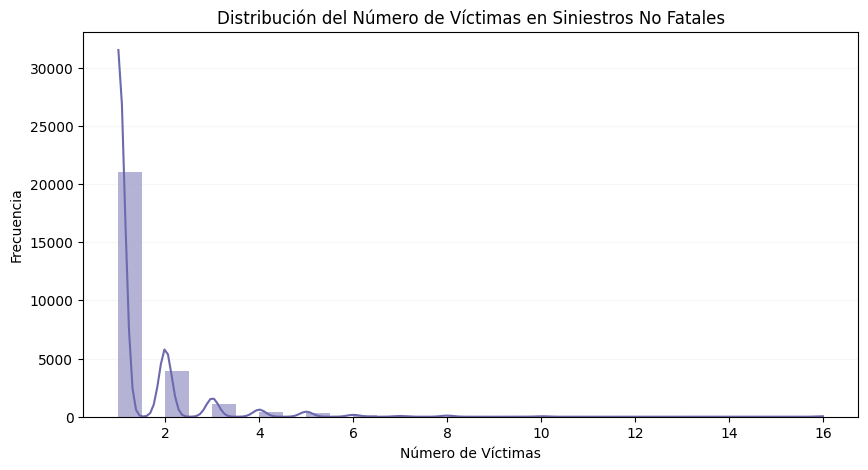

Resumen Estadistico del Numero de victimas con Lesiones Graves y Leves


count    26964.000000
mean         1.382844
std          1.024401
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: nro_victimas, dtype: float64

In [23]:

# Crear el histograma para siniestros con gravedad diferente de 'fatal'
plt.figure(figsize=(10, 5))
sns.histplot(data=siniestros_no_fatal, x='nro_victimas', bins=30, kde=True, color='#6D69AD', edgecolor='none')
plt.title('Distribución del Número de Víctimas en Siniestros No Fatales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.1)
plt.show()

print('Resumen Estadistico del Numero de victimas con Lesiones Graves y Leves')
siniestros_no_fatal['nro_victimas'].describe()


# **Insights**

**Distribución de el Numero las Víctimas:**
  
Basado en los datos proporcionados, podemos concluir lo siguiente sobre la distribución del número de víctimas en nuestro conjunto de datos:

- Para 1 persona como víctima, hay más de 2000 registros, lo que indica una frecuencia significativamente alta en comparación con otros valores.

- Con 2 víctimas, hay alrededor de 400 registros.

- Para 3 víctimas, hay menos de 100 registros.

- Con 4 víctimas, hay menos de 20 registros.

**Esto sugiere que no hay outliers evidentes en el conjunto de datos en términos del número de víctimas, ya que no hay valores que se desvíen significativamente de la distribución observada.**

---
## **Edades de las Victimas - Outliers**

### **Columa Edad - Analisis de Outliers**

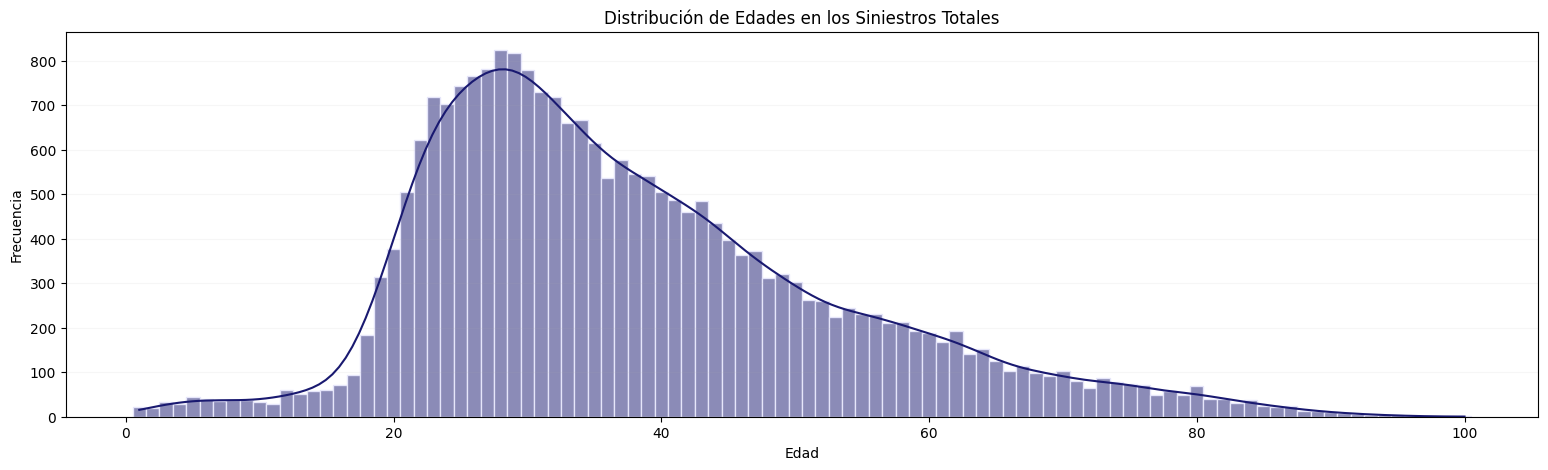

Resumen Estadistico Total de la Columna Edad
count     23422
unique       98
top          28
freq        824
Name: edad, dtype: int64


In [24]:

# Crear el histograma para la distribución de edades en los siniestros
plt.figure(figsize=(19, 5))
sns.histplot(data=siniestros, x='edad', bins=30, kde=True, color='midnightblue', edgecolor='lavender')
plt.title('Distribución de Edades en los Siniestros Totales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.1)
plt.show()

print( 'Resumen Estadistico Total de la Columna Edad')
print(siniestros['edad'].describe())

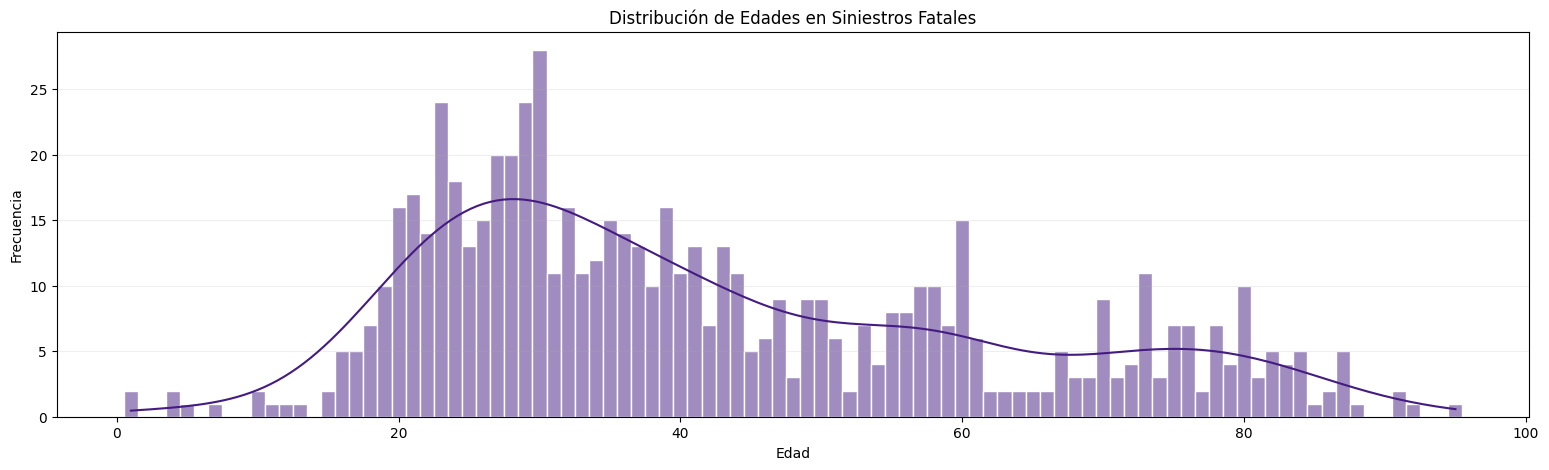

Resumen Estadistico de la Columna Edad con Gravedad fatal


count     664
unique     85
top        30
freq       28
Name: edad, dtype: int64

In [25]:
# Filtrar los siniestros con gravedad 'fatal'
siniestros_fatal = siniestros[siniestros['gravedad'] == 'fatal']

# Crear el histograma para siniestros con gravedad 'fatal'
plt.figure(figsize=(19, 5))
sns.histplot(data=siniestros_fatal, x='edad', bins=30, kde=True, color='#441B80', edgecolor='white')
plt.title('Distribución de Edades en Siniestros Fatales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.2)
plt.show()


print('Resumen Estadistico de la Columna Edad con Gravedad fatal')
siniestros_fatal['edad'].describe()


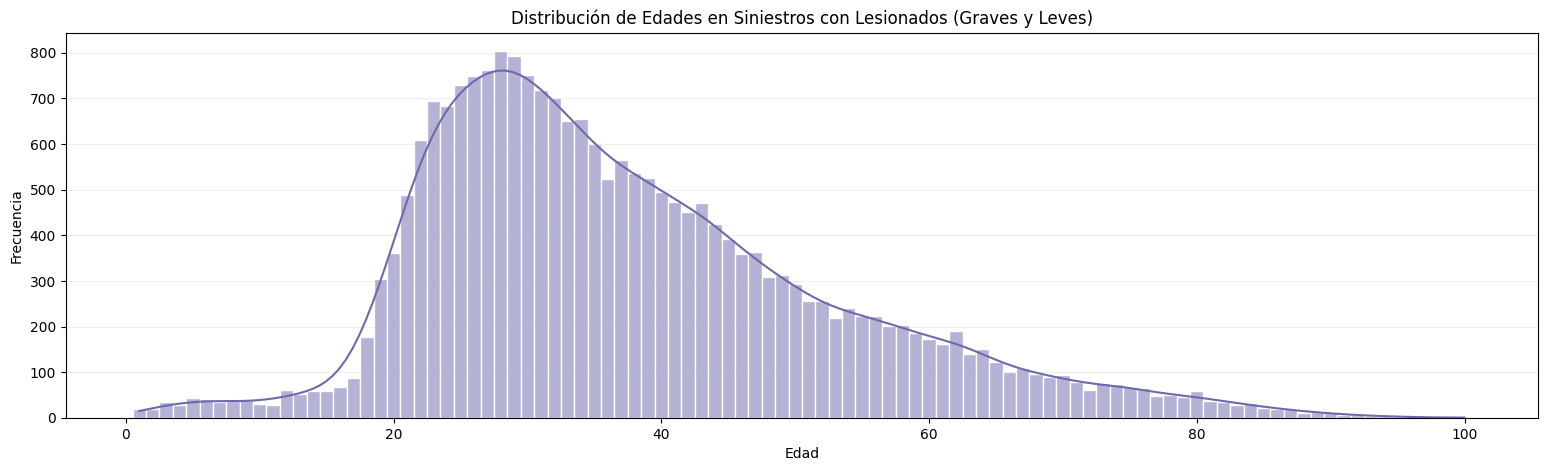

Resumen Estadistico de las edades de victimas con Lesiones Graves y Leves


count     22758
unique       98
top          28
freq        804
Name: edad, dtype: int64

In [26]:

# Filtrar los siniestros con gravedad distinta a 'fatal'
siniestros_no_fatal = siniestros[siniestros['gravedad'] != 'fatal']

# Crear el histograma para siniestros con gravedad distinta a 'fatal'
plt.figure(figsize=(19, 5))
sns.histplot(data=siniestros_no_fatal, x='edad', bins=30, kde=True, color='#6D69AD', edgecolor='white')
plt.title('Distribución de Edades en Siniestros con Lesionados (Graves y Leves)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.2)
plt.show()

print('Resumen Estadistico de las edades de victimas con Lesiones Graves y Leves')
siniestros_no_fatal['edad'].describe()

# **Insights** 

- **Distribución de Edad de las Víctimas:**
  - Observamos una distribución normal de los datos de edad de las víctimas en nuestros registros.

  - No se identificaron outliers evidentes ni registros que parecieran estar significativamente fuera de lo común.

  - El registro más extremo corresponde a una persona de 100 años, lo cual es una ocurrencia posible y no se considera como un outlier.

  **En resumen, la distribución de la edad de las víctimas no cuenta con outliers y parece ser óptima para nuestro análisis futuro.**

---
---
## **Análisis Descriptivo:**

### **1. Distribución del Número de Víctimas**

**Período Observado: 2016-2021**

El análisis de la distribución del número de víctimas en los siniestros viales revela lo siguiente:

- **Mayoría de Siniestros Leves:** La mayoría de los siniestros (26,428 casos) se clasifican como leves. Esta tendencia sugiere que la mayoría de los incidentes en las vías no resultan en lesiones graves o fatales, lo que puede atribuirse a una combinación de factores como medidas de seguridad vehicular y vial, así como la atención oportuna de servicios de emergencia.

- **Presencia de Siniestros Graves y Fatales:** Aunque los siniestros leves dominan el conjunto de datos, también se registran casos significativos de siniestros graves (537 casos) y siniestros fatales (717 casos). Estos eventos, aunque menos frecuentes, tienen un impacto considerable en términos de lesiones graves o pérdida de vidas humanas, lo que subraya la importancia de seguir implementando medidas de prevención y seguridad vial.

Este análisis proporciona una visión general de la distribución de la gravedad de los siniestros viales en el período observado, destacando la necesidad de estrategias continuas para abordar la seguridad en las vías y reducir la incidencia de lesiones y fatalidades.

In [27]:

# Contar el número de registros por gravedad en el DataFrame original
conteo_gravedad = siniestros['gravedad'].value_counts().reset_index()
conteo_gravedad.columns = ['gravedad', 'conteo']

# Crear el gráfico de barras con Plotly Express

# Definir la paleta de colores personalizada
palette_colors = ['#6D69AD', '#441B80']

# Contar el número de registros por gravedad en el DataFrame original
conteo_gravedad = siniestros['gravedad'].value_counts().reset_index()
conteo_gravedad.columns = ['gravedad', 'conteo']

# Crear el gráfico de barras con Plotly Express y especificar la paleta de colores
fig = px.bar(conteo_gravedad, x='gravedad', y='conteo', color='gravedad',
             labels={'conteo': 'Frecuencia', 'gravedad': 'Gravedad'},
             title='Frecuencia de Gravedad',
             color_discrete_sequence=palette_colors)


fig.show()
print('Tabla de Frecuencia por Tipo de Gravedad')
conteo_gravedad

Tabla de Frecuencia por Tipo de Gravedad


,gravedad,conteo
0,leve,26427
1,fatal,717
2,grave,537


---

### **2. Distribución de la hora del incidente:**

**Período Observado: 2016-2021**

En este apartado, se examina la distribución de la hora en la que ocurren los incidentes de tráfico en la Ciudad Autónoma de Buenos Aires (CABA) durante el período de 2016 a 2021.

#### **Análisis de Siniestros Fatales por Hora**

...
Durante el período de observación, se identificó un patrón de siniestros fatales que varía significativamente a lo largo del día:

1. **Horas con Mayor Mortalidad:** Los registros de mortalidad son más altos entre las 5:00 AM y las 7:00 AM. Este intervalo de tiempo coincide con el comienzo del día laboral y escolar, lo que sugiere una relación directa entre el aumento de la actividad vial y la incidencia de siniestros fatales.

2. **Pico Máximo a las 7:00 AM:** El pico máximo se alcanza a las 7:00 AM, momento en el que se registra la mayor cantidad de homicidios viales. Esta hora marca el inicio del tránsito más intenso en las vías, con un aumento significativo de vehículos y peatones en movimiento. El estrés y la prisa asociados con el desplazamiento hacia el trabajo y la escuela pueden contribuir a una mayor propensión a la accidentalidad.

3. **Disminución Posterior a las 8:00 AM:** A partir de las 8:00 AM, se observa una disminución constante en la incidencia de siniestros fatales. Este descenso coincide con el momento en que la mayoría de las personas han llegado a sus destinos, ya sea el lugar de trabajo o el centro educativo, lo que reduce la congestión en las vías y, por ende, el riesgo de accidentes.

Este análisis resalta la importancia de considerar el factor horario al diseñar estrategias de prevención de accidentes y promover la seguridad vial durante las horas críticas del día.

...
#### **Análisis de Siniestros con Lesionados por Hora**

El análisis de la distribución horaria de los siniestros con lesionados revela lo siguiente:

1. **Horas de Mayor Accidentalidad:** Se observa que las horas de mayor accidentalidad, tanto leve como grave, ocurren entre las 11:00 AM y las 7:00 PM. Este período abarca las horas de mayor actividad durante el día, cuando hay un mayor flujo de vehículos y peatones en las vías. La concentración de siniestros en este intervalo de tiempo sugiere la necesidad de medidas adicionales de seguridad vial y vigilancia durante estas horas.

2. **Pico de Siniestros a las 5:00 PM:** A las 5:00 PM se registra un pico en la cantidad de siniestros con lesionados, coincidiendo con el horario en que las personas salen del trabajo. Sin embargo, estos accidentes tienden a ser menos graves en comparación con las horas de la mañana, posiblemente debido a una menor prisa y una conducción más cautelosa por parte de los conductores.

3. **Menor Frecuencia de Accidentes Graves por la Mañana:** En contraste con los accidentes fatales, se observa que entre las 7:00 AM y las 9:00 AM, los siniestros con lesionados son menos frecuentes. Esto sugiere que existe una mayor probabilidad de que un accidente durante estas horas resulte en fatalidades en lugar de lesiones. Esta disparidad destaca la importancia de implementar medidas de seguridad adicionales y concienciar sobre la conducción responsable, especialmente durante las horas pico de la mañana.

In [28]:
# Grafico de frecuencia de accidentes segun la hora del dia

import plotly.graph_objects as go

# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros[siniestros['gravedad'] == 'fatal'].dropna(subset=['hora'])

# Filtrar por gravedad diferente de 'fatal' (víctimas no fatales)
siniestros_no_fatal = siniestros[siniestros['gravedad'] != 'fatal'].dropna(subset=['hora'])

# Obtener la lista completa de franjas horarias (unión de ambas categorías)
franjas_horarias = np.union1d(siniestros_fatal['hora'].unique(), siniestros_no_fatal['hora'].unique())

# Agrupar y contar la cantidad de siniestros en cada categoría para cada franja horaria
fatal_por_horario = siniestros_fatal.groupby('hora').size().reindex(franjas_horarias, fill_value=0)
no_fatal_por_horario = siniestros_no_fatal.groupby('hora').size().reindex(franjas_horarias, fill_value=0)


# Colores
color_fatal = '#441B80'  # Naranja
color_no_fatal = '#6D69AD'  # Azul

# Crear figuras para los gráficos de siniestros fatales y no fatales
fig_fatal = go.Figure()
fig_no_fatal = go.Figure()

# Añadir líneas para siniestros fatales y no fatales a las figuras respectivas
fig_fatal.add_trace(go.Scatter(x=franjas_horarias, y=fatal_por_horario, mode='lines+markers', name='Fatal', line=dict(color=color_fatal)))
fig_no_fatal.add_trace(go.Scatter(x=franjas_horarias, y=no_fatal_por_horario, mode='lines+markers', name='No Fatal', line=dict(color=color_no_fatal)))

# Configurar el diseño del primer gráfico (siniestros fatales)
fig_fatal.update_layout(title='Siniestros Fatales por Hora', xaxis_title='Hora del Día', yaxis_title='Cantidad de Siniestros', showlegend=True)

# Configurar el diseño del segundo gráfico (siniestros no fatales)
fig_no_fatal.update_layout(title='Siniestros No Fatales por Hora', xaxis_title='Hora del Día', yaxis_title='Cantidad de Siniestros', showlegend=True)

# Mostrar los gráficos
fig_fatal.show()
fig_no_fatal.show()

---

### **3. Distribución por edad de las víctimas:**

**Período Observado: 2016-2021**

En este apartado, se examina la distribución de las edades de las víctimas involucradas en accidentes de tráfico en la Ciudad Autónoma de Buenos Aires (CABA) durante el período de 2016 a 2021.

...
#### **Análisis de Víctimas Fatales por Edad**

1. El rango de edades con el mayor número de accidentes fatales se sitúa entre los 20 y los 39 años. Esto sugiere que los adultos jóvenes tienen un mayor riesgo de morir en un accidente de tráfico.

2. A partir de los 20 años, el riesgo de morir en un accidente aumenta significativamente, lo que puede estar relacionado con la adquisición de la licencia de conducir y la mayor exposición a situaciones de riesgo en la carretera.

3. Se observa un pico a los 23 años, lo que podría indicar que las personas se sienten más confiadas al volante después de haber adquirido cierta experiencia en la conducción.

4. A los 30 años se presenta el pico más alto de accidentes fatales. Este aumento podría deberse a factores como el estrés, la fatiga, la excesiva confianza al conducir o la distracción, que son más comunes en personas en la edad adulta joven.

...
#### **Análisis de Víctimas Lesionadas por Edad**

1. Las probabilidades de estar involucrado en un accidente con víctimas lesionadas comienzan a aumentar a partir de los 20 años, con un pico notable a los 28 años. Esto sugiere que los adultos jóvenes tienen un mayor riesgo de sufrir lesiones en un accidente de tráfico.

2. A medida que las personas envejecen, la probabilidad de estar involucrado en un accidente leve disminuye gradualmente. Después de los 65 años, es menos probable verse involucrado en un accidente con lesiones leves.

3. Sin embargo, después de los 75 años, aunque la probabilidad de accidentes leves disminuye, existe cierta posibilidad de que los accidentes resulten en la pérdida de vidas, lo que subraya la importancia de medidas de seguridad adicionales para los conductores mayores.

In [29]:
# Graficos de distribucion en Edades de Victimas de Accidentes

# Paleta de colores
palette_colors = ['#6D69AD', '#441B80']

# Para siniestros fatales
conteo_edad_fatal = siniestros_fatal['edad'].value_counts().reset_index()
conteo_edad_fatal.columns = ['edad', 'conteo_fatal']

fig_fatal = px.bar(conteo_edad_fatal, x='edad', y='conteo_fatal', 
                   labels={'conteo_fatal': 'Frecuencia', 'edad': 'Edad'},
                   title='Distribución de la Edad de las Víctimas Fatales')
fig_fatal.update_traces(marker_color=palette_colors[1])  # Color para siniestros fatales

# Para siniestros no fatales
conteo_edad_no_fatal = siniestros_no_fatal['edad'].value_counts().reset_index()
conteo_edad_no_fatal.columns = ['edad', 'conteo_no_fatal']

fig_no_fatal = px.bar(conteo_edad_no_fatal, x='edad', y='conteo_no_fatal', 
                      labels={'conteo_no_fatal': 'Frecuencia', 'edad': 'Edad'},
                      title='Distribución de la Edad de las Víctimas No Fatales')
fig_no_fatal.update_traces(marker_color=palette_colors[0])  # Color para siniestros no fatales

fig_fatal.show()
fig_no_fatal.show()





---

### **4. Relación entre número de víctimas y hora del incidente:**

**Período Observado: 2016-2021**

Este apartado examina la relación entre el número de víctimas en accidentes de tráfico y la hora del día en la Ciudad Autónoma de Buenos Aires (CABA) durante el período de 2016 a 2021.

...
#### **Análisis del Número de Víctimas Fatales en relación al horario**

1. La mayoría de los accidentes fatales involucran a una sola persona a lo largo del día.

2. Entre las 4:00 AM y las 7:00 AM, se observa un aumento en la frecuencia de accidentes fatales con 2 personas involucradas, lo que sugiere que la prisa por llegar puede aumentar la probabilidad de accidentes mortales.

3. A las 5:00 AM se observa un pico inusual donde varios accidentes involucraron a 3 personas fallecidas, lo cual es un hallazgo significativo que requiere una investigación adicional.

...
#### **Análisis del Número de Víctimas con Lesiones en relación al horario**

1. Es más común que haya varios implicados en accidentes leves y graves a lo largo del día, siendo frecuente que entre 1 y 5 personas se vean involucradas.

2. Parece que las víctimas de más de 6 personas están involucradas en accidentes entre las 11:00 AM y las 4:00 PM, lo que sugiere la utilización de transporte público en esos horarios.

3. Es probable que entre las 8:00 AM y las 4:00 PM se produzcan accidentes con más de 5 personas involucradas, llegando incluso hasta 16 personas, lo que podría indicar la implicación de vehículos más grandes como minibuses.

In [30]:
# Grafico de relacion al horario con el numero de victimas involucradas

# Gráfico de dispersión para siniestros con gravedad 'fatal'
fig_fatal = px.scatter(siniestros_fatal, x='hora', y='nro_victimas', 
                       title='Relación entre Número de Víctimas y Hora del Incidente - Gravedad Fatal',
                       labels={'hora': 'Hora del Incidente', 'nro_victimas': 'Número de Víctimas'})
fig_fatal.update_traces(marker_color='#ff5500', marker_opacity=0.5)
fig_fatal.show()

# Gráfico de dispersión para siniestros con gravedad diferente de 'fatal'
fig_no_fatal = px.scatter(siniestros_no_fatal, x='hora', y='nro_victimas', 
                          title='Relación entre Número de Víctimas y Hora del Incidente - Sin Gravedad Fatal',
                          labels={'hora': 'Hora del Incidente', 'nro_victimas': 'Número de Víctimas'})
fig_no_fatal.update_traces(marker_color='#039FDB', marker_opacity=0.5)
fig_no_fatal.show()


---

### **5. Relación entre número de víctimas y día de la semana:**

**Período Observado: 2016-2021**

En este apartado se analiza la relación entre el número de víctimas en accidentes de tráfico y el día de la semana en la Ciudad Autónoma de Buenos Aires (CABA) durante el período de 2016 a 2021.

...
#### **Análisis del Número de Víctimas Fatales por Día de la Semana**

1. Los accidentes fatales muestran una distribución relativamente uniforme a lo largo de los días de la semana, con cifras consistentes de víctimas en cada día.

2. Se observa un ligero aumento en el número de víctimas fatales los viernes, sábados y domingos. Este incremento alcanza su punto máximo los domingos, lo que sugiere la posible influencia del consumo de alcohol u otros factores de riesgo durante el fin de semana.

3. El domingo resalta como el día con mayor número de víctimas fatales, atribuible a una combinación de factores como una posible relajación en las normas de seguridad vial, mayor tráfico en las carreteras y el potencial aumento de conductores bajo la influencia del alcohol o la fatiga.
   
...
#### **Análisis del Número de Víctimas con Lesiones por Día de la Semana**

1. Los jueves y viernes presentan una mayor frecuencia de accidentes con víctimas leves o graves. Esto puede atribuirse a la fatiga acumulada durante la semana laboral o a un aumento en el tráfico en las horas pico de esos días.

2. Contrariamente a los accidentes fatales, los fines de semana, especialmente los sábados y domingos, muestran una disminución en la frecuencia de accidentes con víctimas leves o graves. Sin embargo, esto coincide con un aumento en el riesgo de accidentes fatales, lo que podría indicar una relación inversa entre la gravedad de los accidentes y su frecuencia durante los fines de semana.

3. Los viernes destacan como un día crítico con un aumento en el riesgo de accidentes leves y graves, así como un incremento en el número de accidentes fatales. Esto sugiere una combinación de factores, como la fatiga acumulada, el aumento del tráfico y posiblemente un comportamiento más arriesgado de los conductores al anticipar el fin de semana.

In [31]:
# Grafico de frecuencia de accidentes segun el dia de la semana

# Definir la paleta de colores
palette_colors = ['#441B80', '#6D69AD']


# Obtener el día de la semana a partir de la columna de fecha para siniestros fatales
siniestros_fatal['dia_semana'] = siniestros_fatal['fecha'].dt.day_name()

# Obtener el día de la semana a partir de la columna de fecha para siniestros no fatales
siniestros_no_fatal['dia_semana'] = siniestros_no_fatal['fecha'].dt.day_name()

# Agrupar los datos por día de la semana y contar el número total de víctimas para siniestros fatales
siniestros_fatal_por_dia = siniestros_fatal.groupby('dia_semana')['nro_victimas'].sum().reset_index()

# Agrupar los datos por día de la semana y contar el número total de víctimas para siniestros no fatales
siniestros_no_fatal_por_dia = siniestros_no_fatal.groupby('dia_semana')['nro_victimas'].sum().reset_index()

# Ordenar los días de la semana de manera cronológica
orden_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
siniestros_fatal_por_dia['dia_semana'] = pd.Categorical(siniestros_fatal_por_dia['dia_semana'], categories=orden_dias_semana, ordered=True)
siniestros_fatal_por_dia = siniestros_fatal_por_dia.sort_values('dia_semana')

siniestros_no_fatal_por_dia['dia_semana'] = pd.Categorical(siniestros_no_fatal_por_dia['dia_semana'], categories=orden_dias_semana, ordered=True)
siniestros_no_fatal_por_dia = siniestros_no_fatal_por_dia.sort_values('dia_semana')

# Crear el gráfico de barras para siniestros fatales
fig_fatal = px.bar(siniestros_fatal_por_dia, x='dia_semana', y='nro_victimas',
                   labels={'nro_victimas': 'Número de Víctimas', 'dia_semana': 'Día de la Semana'},
                   title='Relación entre Número de Víctimas Fatales y Día de la Semana')
fig_fatal.update_traces(marker_color=palette_colors[0])  # Color para siniestros fatales
fig_fatal.show()

# Crear el gráfico de barras para siniestros no fatales
fig_no_fatal = px.bar(siniestros_no_fatal_por_dia, x='dia_semana', y='nro_victimas',
                      labels={'nro_victimas': 'Número de Víctimas', 'dia_semana': 'Día de la Semana'},
                      title='Relación entre Número de Víctimas No Fatales y Día de la Semana')
fig_no_fatal.update_traces(marker_color=palette_colors[1])  # Color para siniestros no fatales
fig_no_fatal.show()


---

### **6. Distribución de la gravedad por comuna:**

**Período Observado: 2016-2021**

En este apartado se examina la distribución de la gravedad de los accidentes en la Ciudad Autónoma de Buenos Aires (CABA) según la comuna donde ocurrieron durante el período de 2016 a 2021.

...
#### **Análisis de Accidentes Fatales en relación a la Comuna**

1. La Comuna 1, que abarca los barrios Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución, registra el mayor número de accidentes fatales en CABA. Esta zona central de la ciudad, caracterizada por una alta densidad de tráfico y actividad comercial, presenta un riesgo elevado de accidentes mortales.

2. Le siguen en frecuencia las comunas 4, 7, 8 y 9, donde la probabilidad de fallecer en un accidente es considerablemente alta. En estas comunas, es más probable experimentar un accidente fatal que uno de menor gravedad.

3. Por el contrario, la Comuna 6 muestra la menor probabilidad de tener un accidente fatal en comparación con el resto de las comunas de CABA.

...
#### **Análisis de Accidentes Leves en relación a la Comuna**

1. La Comuna 1 destaca nuevamente como la de mayor probabilidad de tener accidentes con lesionados, superando significativamente a las demás comunas. Esta área central de la ciudad, con su elevada actividad comercial y tráfico, presenta un riesgo cuatro veces mayor de sufrir accidentes leves.

2. En general, las demás comunas mantienen una probabilidad constante de accidentes leves, con algunos picos notables en la Comuna 12 y 14.

3. Una vez más, la Comuna 6 exhibe la menor probabilidad de tener un accidente con lesionados en comparación con las otras comunas de CABA.

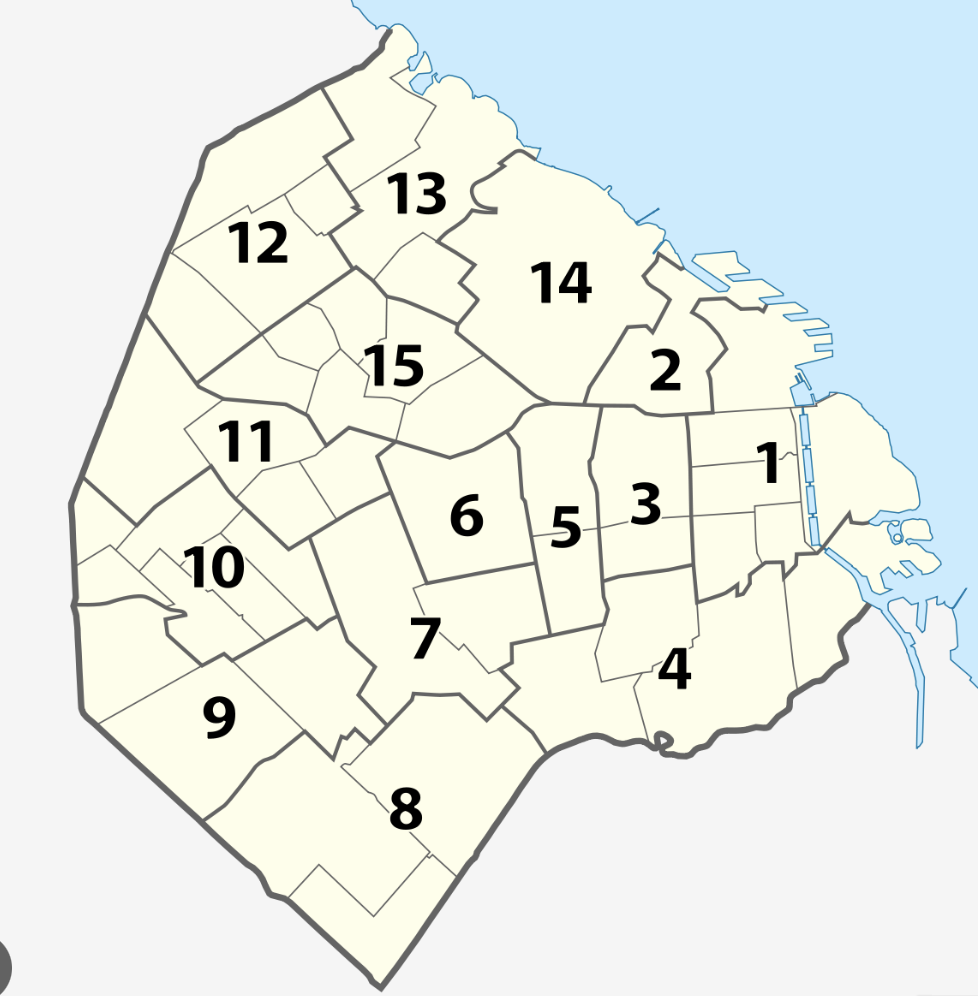

In [32]:
# Comunas Buenos Aires, Argentina.

from IPython.display import Image

ruta_imagen = "../Assets/ComunasCABA.png"

# print('Comunas Buenos Aires, Argentina.')
Image(filename=ruta_imagen, width=400)

In [33]:
#Grafico de distribucion del tipo de Gravedad por Comuna 

# Colores utilizados
# color_fatal = '#ff5500'  # Para siniestros fatales
# color_no_fatal = '#039FDB'  # Para siniestros no fatales
color_fatal = '#441B80'  # Para siniestros fatales
color_no_fatal = '#6D69AD'  # Para siniestros no fatales

# Agrupamos los datos por comuna y gravedad, y contamos la cantidad de registros
siniestros_fatal_por_comuna = siniestros_fatal['comuna'].value_counts()
siniestros_no_fatal_por_comuna = siniestros_grave['comuna'].value_counts()

# Lista de comunas
comunas = siniestros['comuna'].unique()

# Creamos el gráfico de barras agrupadas
fig = go.Figure()

# Agregamos las barras para los siniestros fatales
fig.add_trace(go.Bar(
    x=comunas,
    y=[siniestros_fatal_por_comuna.get(comuna, 0) for comuna in comunas],
    name='Fatales',
    marker_color=color_fatal
))

# Agregamos las barras para los siniestros no fatales
fig.add_trace(go.Bar(
    x=comunas,
    y=[siniestros_no_fatal_por_comuna.get(comuna, 0) for comuna in comunas],
    name='No fatales',
    marker_color=color_no_fatal
))

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Distribución de la Gravedad por Comuna',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Cantidad de Siniestros',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1200,  # Ancho de la figura
    height=600   # Alto de la figura
)


fig.show()


print('Grafico de Poblacion por comuna entre los años 2016 y 2021')
# Remover comas de los valores de población y convertirlos a enteros
poblacion[['2016', '2017', '2018', '2019', '2020', '2021']] = poblacion[['2016', '2017', '2018', '2019', '2020', '2021']].replace(',', '', regex=True).astype(int)

# Calcular la población promedio por comuna entre los años 2016 y 2021
poblacion_promedio = poblacion[['2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1)

# Crear un nuevo DataFrame con los datos de población promedio y las comunas
data = pd.DataFrame({'Comuna': poblacion['Comuna'], 'Población Promedio': poblacion_promedio})

# Ordenar los datos por población promedio de mayor a menor
data_sorted = data.sort_values(by='Población Promedio', ascending=False)

# Crear el gráfico de barras utilizando Plotly Express y la paleta de colores 'Viridis'
fig = px.bar(data_sorted, x='Comuna', y='Población Promedio',
             labels={'Población Promedio': 'Población Promedio (2016-2021)', 'Comuna': 'Comuna'},
             title='Distribución Poblacional Promedio por Comuna (2016-2021)',
             color='Población Promedio',
             color_continuous_scale='Purples')

# Personalizar el diseño del gráfico
fig.update_layout(xaxis_title='Comuna', yaxis_title='Población Promedio (2016-2021)')

# Mostrar el gráfico
fig.show()


Grafico de Poblacion por comuna entre los años 2016 y 2021


---

### **7. Distribución de la gravedad por tipo de calle:**

**Período Observado: 2016-2021**

En este análisis, se examina la relación entre el tipo de calle y la gravedad de los accidentes ocurridos en la Ciudad Autónoma de Buenos Aires (CABA) durante el período comprendido entre 2016 y 2021.

...
#### **Análisis de Accidentes Fatales en relación al tipo de calle:**

1. Las avenidas son el tipo de calle con mayor incidencia de accidentes fatales, causando una cantidad significativamente alta de mortalidad en comparación con otros tipos de calles.
   
2. Es importante tener en cuenta que una avenida se define como una vía de comunicación principal dentro de una ciudad, generalmente con dos sentidos de circulación, lo que puede contribuir significativamente a su alto índice de accidentes fatales.

3. Después de las avenidas, las calles son el segundo tipo de vía donde se registran más accidentes mortales.

...
#### **Análisis de Accidentes Leves en relación al tipo de calle:**

1. Nuevamente, las avenidas muestran el índice más alto de accidentes no letales, seguidas por las calles y la autopista General Paz. Por último, las autopistas tienen la menor incidencia de accidentes leves.

Este análisis resalta la importancia de considerar el tipo de calle al estudiar la distribución de la gravedad de los accidentes en la Ciudad de Buenos Aires. Las avenidas, al ser vías principales, presentan un mayor riesgo de accidentes graves, lo que destaca la necesidad de medidas adicionales de seguridad y regulación de tráfico en estas áreas.


In [34]:

# Colores utilizados
color_fatal = '#441B80'  # Para siniestros fatales
color_no_fatal = '#6D69AD'  # Para siniestros no fatales

# Agrupar los datos por tipo de calle y gravedad, y contar la cantidad de registros
siniestros_fatal_por_tipo_calle = siniestros_fatal['tipo_calle'].value_counts()
siniestros_no_fatal_por_tipo_calle = siniestros_grave['tipo_calle'].value_counts()

# Tipos de calles
tipos_calle = siniestros['tipo_calle'].unique()

# Crear el gráfico de barras agrupadas
fig = go.Figure()

# Calcular el ancho de las barras
bar_width = 0.4

# Agregar las barras para los siniestros fatales
fig.add_trace(go.Bar(
    x=tipos_calle,
    y=[siniestros_fatal_por_tipo_calle.get(tipo_calle, 0) for tipo_calle in tipos_calle],
    name='Fatales',
    marker_color=color_fatal,
    width=bar_width
))

# Agregar las barras para los siniestros no fatales
fig.add_trace(go.Bar(
    x=tipos_calle,
    y=[siniestros_no_fatal_por_tipo_calle.get(tipo_calle, 0) for tipo_calle in tipos_calle],
    name='No fatales',
    marker_color=color_no_fatal,
    width=bar_width
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Relación entre el Número de Víctimas y el Tipo de Calle',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Cantidad de Siniestros',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',  # Agrupar las barras
    bargap=0.15,  # Espacio entre grupos de barras
    bargroupgap=0.1,  # Espacio entre las barras dentro de un grupo
    width=1200,  # Ancho de la figura
    height=600   # Alto de la figura
)

fig.show()


In [35]:
analisis_categorico(siniestros,'tipo_calle')

,tipo_calle,Frecuencia
0,autopista,117
1,avenida,8184
2,calle,6248
3,gral paz,732


---

### **8. Relación Entre el Número de Víctimas y el Género:**

**Período Observado: 2016-2021**

El análisis de la relación entre el número de víctimas y el género en los accidentes viales arroja los siguientes hallazgos:

### **Análisis de Accidentes Fatales en relación al género**
1. El 70% de las víctimas en accidentes viales fatales son hombres, lo que sugiere una mayor incidencia de accidentes mortales entre la población masculina.
   
   - **Posibles Causas:**
     - Comportamientos de riesgo: Los hombres tienden a estar más involucrados en comportamientos de riesgo al conducir, como exceso de velocidad, manejo agresivo o falta de uso del cinturón de seguridad.
     - Mayor exposición: Los hombres pueden pasar más tiempo conduciendo o viajando en vehículos que las mujeres, lo que aumenta su exposición al riesgo de accidentes.
     - Factores socioeconómicos: Algunos estudios sugieren que factores socioeconómicos, como la ocupación y el nivel de ingresos, pueden influir en la probabilidad de estar involucrado en accidentes fatales, con los hombres a menudo ocupando trabajos que implican mayor riesgo vial.

2. Aunque este número es significativamente alto, solo el 30% de las víctimas fatales son mujeres, lo que indica una disparidad en la distribución de los accidentes mortales según el género.

   - **Posibles Razones:**
     - Diferencias en el comportamiento de conducción: Las mujeres tienden a ser más cautelosas al conducir y a seguir las normas de tráfico, lo que puede reducir su riesgo de estar involucradas en accidentes mortales.
     - Preferencia por modos de transporte más seguros: Las mujeres pueden optar por modos de transporte más seguros, como el transporte público o viajar como pasajeras, lo que disminuye su exposición al riesgo de accidentes mortales en comparación con los hombres.

In [36]:


# Agrupar los datos por sexo y contar la cantidad de víctimas
data_grouped = siniestros_fatal['sexo'].value_counts().reset_index(name='num_victimas')

# Crear el gráfico
fig = go.Figure()

# Agregar los datos al gráfico como un diagrama de barras horizontal
fig.add_trace(go.Bar(
    y=data_grouped['sexo'],  # eje y: sexo
    x=data_grouped['num_victimas'],  # eje x: cantidad de víctimas
    orientation='h',  # orientación horizontal
    marker_color='#441B80'  # color de las barras
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Relación entre Número de Víctimas y el Genero - Accidentes Fatales',
    xaxis_title='Cantidad de Víctimas Fatales',
    yaxis_title='Sexo',
    yaxis_categoryorder='total ascending'  # Ordenar las categorías por el total de víctimas
)

# Mostrar el gráfico
fig.show()


### **Análisis de Accidentes Leves en relación al género**
1. El 67% de las víctimas lesionadas en accidentes son hombres, lo que señala una predominancia de accidentes con lesiones entre la población masculina.

   - **Posibles Explicaciones:**
     - Comportamientos de riesgo similares: Al igual que en los accidentes fatales, los hombres pueden estar más inclinados a participar en comportamientos de riesgo al conducir, lo que aumenta su probabilidad de sufrir lesiones en accidentes viales.
     - Factores físicos: Algunas diferencias físicas entre hombres y mujeres, como la fuerza muscular y la resistencia al impacto, pueden influir en la gravedad de las lesiones sufridas en un accidente.

2. A su vez, el 33% de las víctimas lesionadas son mujeres, lo que indica una proporción considerable pero menor en comparación con los hombres en cuanto a accidentes con lesiones.

   - **Posibles Causas:**
     - Menor exposición al riesgo: Las mujeres pueden pasar menos tiempo conduciendo o viajando en vehículos, lo que reduce su exposición al riesgo de accidentes con lesiones.
     - Comportamientos de conducción más seguros: Las mujeres tienden a seguir normas de conducción más seguras y pueden ser más propensas a usar cinturones de seguridad y otros dispositivos de seguridad, lo que puede reducir su probabilidad de sufrir lesiones en un accidente.


In [37]:

# Agrupar los datos por sexo y contar la cantidad de víctimas
data_grouped1 = siniestros_grave['sexo'].value_counts().reset_index(name='num_victimas')

# Crear el gráfico
fig = go.Figure()

# Agregar los datos al gráfico como un diagrama de barras horizontal
fig.add_trace(go.Bar(
    y=data_grouped1['sexo'],  # eje y: sexo
    x=data_grouped1['num_victimas'],  # eje x: cantidad de víctimas
    orientation='h',  # orientación horizontal
    marker_color='#6D69AD'  # color de las barras
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Relación entre Número de Víctimas y el Genero - Accidentes con Lesionados',
    xaxis_title='Cantidad de Víctimas Con Lesionados',
    yaxis_title='Sexo',
    yaxis_categoryorder='total ascending'  # Ordenar las categorías por el total de víctimas
)

# Mostrar el gráfico
fig.show()


---

### **9. Mapa de Calor de la Densidad de Incidentes por Ubicación:**

**Período Observado: 2016-2021**

El análisis de la densidad de incidentes por ubicación, representado en un mapa de calor, revela las siguientes observaciones:

### **Análisis de Incidentes Graves y Fatales por Ubicación**

1. Se observa una mayor concentración de incidentes graves y fatales en áreas específicas, destacándose Monserrat, San Cristóbal y las zonas cercanas a la Plaza de la Constitución, todas ubicadas dentro de la Comuna 1.

   - **Posibles Causas:**
     - Altas densidades de tráfico: Estas áreas suelen ser puntos neurálgicos de tráfico vehicular y peatonal en la ciudad, lo que aumenta el riesgo de accidentes.
     - Intersecciones peligrosas: Las intersecciones en estas zonas pueden presentar condiciones de tráfico complicadas, falta de señalización adecuada o diseño deficiente, contribuyendo a la incidencia de accidentes graves y fatales.

2. Se registra otra concentración notable de incidentes graves y fatales en la zona de Flores, específicamente en la Avenida Los Libertadores.

   - **Posibles Factores:**
     - Características viales: La Avenida Los Libertadores puede presentar características que contribuyan a la ocurrencia de accidentes graves, como altas velocidades, cruces peatonales peligrosos o falta de medidas de seguridad vial.

3. Existe una alta densidad de accidentes fatales en la Autopista Presidente Arturo Frondizi.

   - **Razones Probables:**
     - Condiciones de la vía: La autopista puede tener condiciones que aumenten el riesgo de accidentes fatales, como altas velocidades, curvas peligrosas o falta de mantenimiento adecuado.


In [38]:
import plotly.graph_objects as go

# Crear el mapa de calor con los datos de siniestros_fatal
fig = go.Figure(go.Densitymapbox(lat=siniestros_fatal['latitud'], 
                                 lon=siniestros_fatal['longitud'], 
                                 radius=10))

# Personalizar el diseño del mapa
fig.update_layout(mapbox_style="open-street-map",  # Estilo del mapa
                  mapbox_center_lon=-58.4438,  # Centrar el mapa en longitud (Ubicación de Buenos Aires)
                  mapbox_center_lat=-34.6044,  # Centrar el mapa en latitud (Ubicación de Buenos Aires)
                  mapbox_zoom=10,  # Zoom del mapa
                  margin={"r":0,"t":0,"l":0,"b":0},  # Margen del gráfico
                  width=900  # Ancho del gráfico
                 )

# Mostrar el gráfico
print('Mapa de Calor de densidad de incidentes en accidentes Fatales por ubicacion')
fig.show()


Mapa de Calor de densidad de incidentes en accidentes Fatales por ubicacion



### **Análisis de Incidentes Leves por Ubicación**

1. Se identifica una gran cantidad de incidentes leves en el cruce de la Avenida Leandro N. Alem y la Avenida Córdoba.

   - **Factores Posibles:**
     - Intersección concurrida: Esta intersección puede experimentar altos volúmenes de tráfico y peatones, lo que aumenta la probabilidad de incidentes leves.
     - Factores de diseño: La disposición de la intersección o la falta de señalización adecuada pueden contribuir a la ocurrencia de incidentes.

2. Se registra una alta densidad de accidentes leves y graves en la zona de la Plaza Constitución.

   - **Causas Potenciales:**
     - Congestión vial: La Plaza Constitución es un importante nodo de transporte en la ciudad, lo que puede generar congestión y condiciones propicias para los accidentes.
     - Comportamientos de los conductores: La alta actividad vehicular y peatonal puede aumentar la probabilidad de comportamientos arriesgados por parte de los conductores, contribuyendo a la ocurrencia de accidentes.

3. Se observa una gran cantidad de registros de incidentes leves y graves sobre la Avenida Rivadavia a la altura de la Plaza Miserere.

   - **Factores Contribuyentes:**
     - Tráfico intenso: La Avenida Rivadavia es una de las principales arterias viales de la ciudad, lo que puede resultar en altos volúmenes de tráfico y una mayor probabilidad de incidentes.
     - Intersecciones conflictivas: La presencia de intersecciones complicadas o mal diseñadas en esta área puede aumentar el riesgo de accidentes.

In [39]:


import plotly.graph_objects as go

# Crear el mapa de calor con los datos de siniestros_fatal
fig = go.Figure(go.Densitymapbox(lat=siniestros_grave['latitud'], 
                                 lon=siniestros_grave['longitud'], 
                                 radius=10))

# Personalizar el diseño del mapa
fig.update_layout(mapbox_style="open-street-map",  # Estilo del mapa
                  mapbox_center_lon=-58.4438,  # Centrar el mapa en longitud (Ubicación de Buenos Aires)
                  mapbox_center_lat=-34.6044,  # Centrar el mapa en latitud (Ubicación de Buenos Aires)
                  mapbox_zoom=10,  # Zoom del mapa
                  margin={"r":0,"t":0,"l":0,"b":0},  # Margen del gráfico
                  width=900  # Ancho del gráfico
                 )

# Mostrar el gráfico
print('Mapa de Calor de densidad de incidentes en accidentes con Lesionados por ubicacion')
fig.show()


Mapa de Calor de densidad de incidentes en accidentes con Lesionados por ubicacion


---
## **Preparación de los Datos para Visualización**

Crearemos una nueva copia de los datos para nuestra sección de visualización.

In [40]:

# Eliminar las columnas 'año', 'mes', 'trimestre' y 'semestre' del DataFrame siniestros para propositos de visualizacion en tableau
siniestros_fatal.drop(columns=['año', 'mes', 'trimestre', 'semestre'], inplace=True)
# creamos un dataset solo con los datos de accidentes fatales
siniestros_fatal.to_csv('../Datasets/2_cleaned_data/siniestros_fatal_VIZ.csv', index=False)


# creamos un dataset solo son los accidentes de motos fatales
siniestros_motos_fatal = siniestros_fatal[(siniestros_fatal['victima'] == 'moto') | (siniestros_fatal['acusado'] == 'moto')]
siniestros_motos_fatal.to_csv('../Datasets/2_cleaned_data/siniestros_motos_fatal_VIZ.csv', index=False)



## **Creacion de Base De datos SQL** 


In [41]:
# Llamar a la función 'create_mysql_db' para importar los datos a MYSql

# create_mysql_db('siniestros_viales.csv', 'db_PI_DA', 'siniestros', host='localhost', user='root', password='root1234')


Tomé la decisión de crear una base de datos en MySQL con el fin de almacenar los datos curados, así mismo poder generar algunas consultas para nuestros KPI´s aprovechando la robustez del motor de base de datos.